In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [3]:
df = pd.read_csv('mnist.csv').values

In [4]:
df.shape

(9999, 785)

In [5]:
df

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 6]])

In [6]:
Y = df[:,-1]
X = df[:,:-1]

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
Y.shape

(9999,)

In [14]:
X[0].shape

(784,)

2


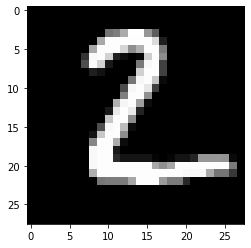

In [16]:
i = 0;

plt.imshow(X[0].reshape(28,28), cmap='gray')
print(Y[0])

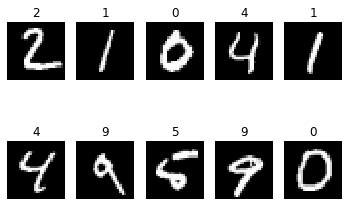

In [10]:
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.title(str(Y[i]))
    plt.axis("off")
plt.show()

In [11]:
split = int(0.8*(X.shape[0]))

In [12]:
X_train = X[:split]
X_test = X[split:]

y_train = Y[:split]
y_test = Y[split:]

In [13]:
def dist(a1,a2):
    return (np.sum(a1-a2)**2)**0.5

In [14]:
def KNN(X,Y,test_point,k=7):
    m = X.shape[0]
    vals = []
    for i in range(m):
        d = dist(test_point, X[i])
        vals.append((d,Y[i]))
    
    vals = sorted(vals)
    vals = np.array(vals[:5])
    
    b = np.unique(vals[:,1], return_counts=True)
    idx = np.argmax(b[1])
    pred = b[0][idx]
    
    return pred
        

In [17]:
test = pd.read_csv("test.csv").values

In [18]:
test.shape

(28000, 784)

In [ ]:
for i in range(test.shape[0]):
    pred = KNN(X_train, y_train,test[i])